### Customer Segmentation Additional Clustering Methods

In order to deepen the analysis of the dataset and gain better insights into its structure, we explored three additional clustering methods beyond KMeans: `Agglomerative Clustering`, `Gaussian Mixture Model (GMM)`, and `DBSCAN`.

Each of these algorithms approaches the clustering task with a different underlying assumption and methodology.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import dendrogram, linkage

In [98]:
df = pd.read_csv("data/Mall_Customers.csv")

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [107]:
def evaluate_clustering(X_scaled, labels, method_name):
    sil = silhouette_score(X_scaled, labels)
    print(f"{method_name}:")
    print(f"  Silhouette Score: {sil:.3f}")
    print()

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=50, legend='full')
    plt.title(f'{method_name} Clustering (PCA)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_dendrogram(X_scaled):
    Z = linkage(X_scaled, method='ward')
    plt.figure(figsize=(10, 6))
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title('Dendrogram - Agglomerative Clustering')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

### Agglomerative Clustering

**Agglomerative Clustering** is a hierarchical method that builds clusters step-by-step by merging the closest pairs of clusters.

Unlike KMeans, it does not require clusters to be spherical or equally sized, making it suitable for more complex cluster shapes.

We visualized the cluster hierarchy using a dendrogram, which helps to understand how clusters merge at different distance thresholds.

The silhouette score obtained was 0.361, indicating moderately well-separated clusters, slightly lower than KMeans, but still meaningful.

Agglomerative Clustering:
  Silhouette Score: 0.361



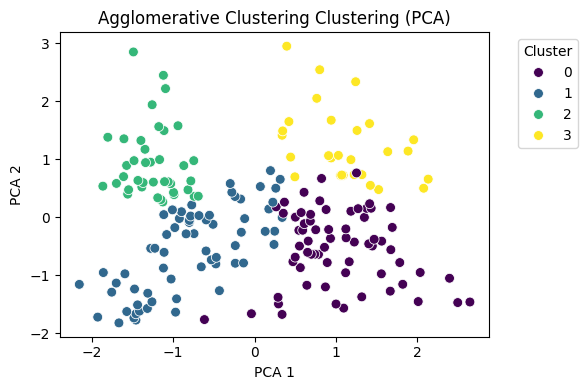

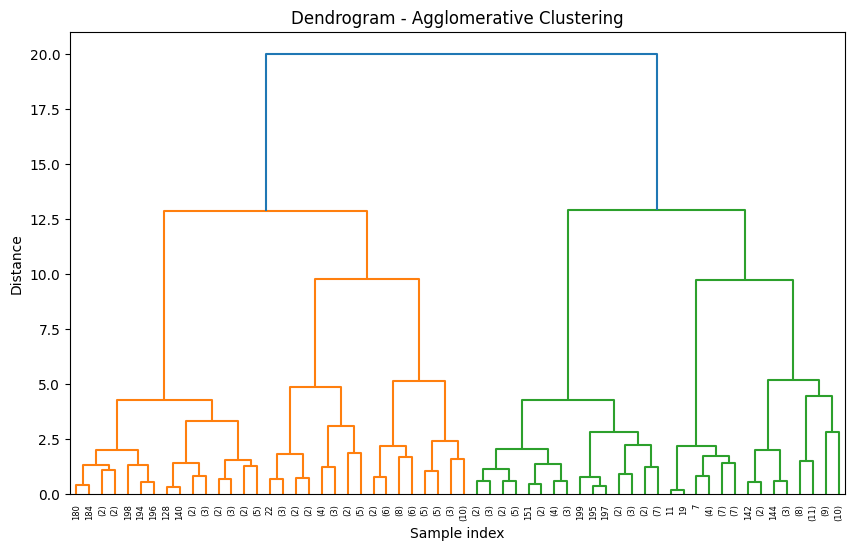

In [108]:
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(X_scaled)
evaluate_clustering(X_scaled, labels_agg, "Agglomerative Clustering")
plot_dendrogram(X_scaled)

### Gaussian Mixture Model (GMM)

**Gaussian Mixture Model (GMM)** is a probabilistic clustering algorithm that models the data as a mixture of several Gaussian distributions.

Instead of assigning each point to a single cluster definitively, GMM estimates the probability of membership in each cluster, providing a soft clustering. This flexibility allows GMM to capture overlapping or elongated clusters more effectively.

The silhouette score for GMM was 0.373, showing marginally better performance than Agglomerative Clustering, but still somewhat below the KMeans baseline.

Gaussian Mixture Model:
  Silhouette Score: 0.373



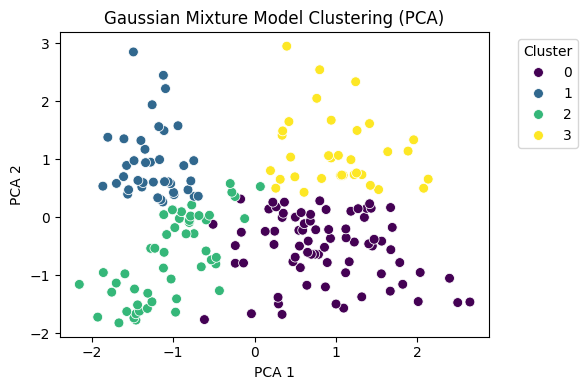

In [109]:
gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
evaluate_clustering(X_scaled, labels_gmm, "Gaussian Mixture Model")

### DBSCAN

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
identifies clusters based on regions of high point density and can detect outliers as noise.

It does not require specifying the number of clusters beforehand, which makes it attractive for exploratory analysis. However, with default parameters, DBSCAN achieved a silhouette score of 0.185, reflecting less distinct clusters and potentially many points classified as noise. This lower score highlights the sensitivity of DBSCAN to its parameters and data density distribution.

DBSCAN:
  Silhouette Score: 0.185



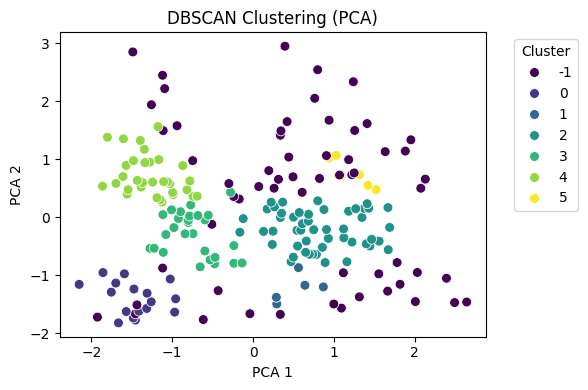

In [110]:
dbscan = DBSCAN()
labels_dbscan = dbscan.fit_predict(X_scaled)
evaluate_clustering(X_scaled, labels_dbscan, "DBSCAN")

### Conclusion

Comparing the silhouette scores from all methods (KMeans: 0.404, GMM: 0.373, Agglomerative: 0.361, DBSCAN: 0.185) shows that while KMeans provides the clearest clustering for this dataset, GMM and Agglomerative Clustering are viable alternatives with different modeling assumptions. DBSCAN's lower score suggests that the dataset may not have clear dense regions fitting its clustering paradigm, or that parameter tuning is needed.